In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('datos.csv')

# Generar 10 al azar

In [ ]:
# ids al azar
import random
clientes_random = df['id_cliente'].sample(n=10).values
X = df[df['id_cliente'].isin(clientes_random)]

In [ ]:
X.to_excel('df_random.xlsx', index=False)

# Conociendo los datos

In [ ]:
df.shape

(358360, 12)

In [ ]:
df.dtypes
# conocer los tipos de datos
# vamos a cambiar la fecha a tipo datetime

tipo_transaccion      object
nombre_comercio       object
giro_nombre           object
mcc_nombre            object
fecha_transaccion     object
ope_pais              object
entry_mode            object
sexo_cliente          object
estado_cliente        object
edad_cliente         float64
monto_transaccion    float64
id_cliente             int64
dtype: object

In [ ]:
df['fecha_transaccion'] = pd.to_datetime(df['fecha_transaccion'])
df.dtypes

tipo_transaccion              object
nombre_comercio               object
giro_nombre                   object
mcc_nombre                    object
fecha_transaccion             object
ope_pais                      object
entry_mode                    object
sexo_cliente                  object
estado_cliente                object
edad_cliente                 float64
monto_transaccion            float64
id_cliente                     int64
fecha_transaccion     datetime64[ns]
dtype: object

In [ ]:
df.columns
# saber nombres de columnas

Index(['tipo_transaccion', 'nombre_comercio', 'giro_nombre', 'mcc_nombre',
       'fecha_transaccion', 'ope_pais', 'entry_mode', 'sexo_cliente',
       'estado_cliente', 'edad_cliente', 'monto_transaccion', 'id_cliente',
       'fecha_transaccion '],
      dtype='object')

In [6]:
df.isnull().sum()
# ver si hay NA
# no hay datos faltantes

tipo_transaccion      0
nombre_comercio       0
giro_nombre           0
mcc_nombre            0
fecha_transaccion     0
ope_pais              0
entry_mode            0
sexo_cliente          0
estado_cliente        0
edad_cliente          0
monto_transaccion     0
id_cliente            0
fecha_transaccion     0
dtype: int64

In [ ]:
df.duplicated().sum()
# valores duplicados, hay 642, los vamos a quitar para que no afecten el modelo ML

642

In [ ]:
df[df.duplicated()].head(2)

,tipo_transaccion,nombre_comercio,giro_nombre,mcc_nombre,fecha_transaccion,ope_pais,entry_mode,sexo_cliente,estado_cliente,edad_cliente,monto_transaccion,id_cliente,fecha_transaccion
7077,TDD,CITYCLUB1018 IXTAPALUCIXTAPALUCA EM00,SUPERMERCADOS,AUTOSERVICIOS Y SUPERMERCADOS,2022-12-21 14:03:00,MX,CARD PRESENT,M,MEXICO,59.0,358.75,7557,2022-12-21 14:03:00
21207,TDC,SNP*MERCADOPAGO CIUDAD DE MEX001,AGREGADOR,AGREGADOR,2023-01-03 21:20:00,MX,CARD NOT PRESENT,F,NUEVO LEON,19.0,113.79,1182,2023-01-03 21:20:00


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(357718, 13)

# Limpieza y exploracion de datos

variables categoricas

In [ ]:
df['tipo_transaccion'].value_counts()

TDD    209375
TDC    148343
Name: tipo_transaccion, dtype: int64

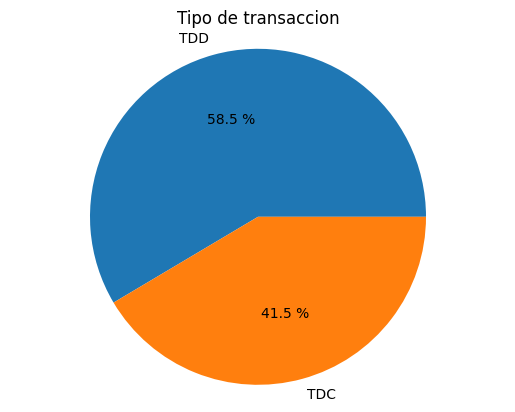

In [ ]:
plt.pie(df["tipo_transaccion"].value_counts(), labels=["TDD", "TDC"], autopct="%0.1f %%")
plt.axis("equal")
plt.title("Tipo de transaccion")
plt.show()

In [ ]:
df['nombre_comercio'].value_counts()

MERCADO PAGO          CIUDAD DE MEXDF     8783
STP*UBER PENDING      CIUDAD DE MEX001    6402
SNP*MERCADOPAGO       CIUDAD DE MEX001    6347
DLOCAL*DIDI RIDES     CIUDAD DE MEX001    4757
DLOCAL*DIDI FOOD      CIUDAD DE MEX001    2926
                                          ... 
STR*VAN GOGH XPERIENCECIUDAD DE MEX001       1
BAE SUBESTACION       MONTERREY NL 000       1
DOMINOS SAUCITO       SN LUIS POTOSSL        1
SORIANA947 LERMA      LERMA EM     00        1
FIRST CASH            SOLEDAD DE GR000       1
Name: nombre_comercio, Length: 84774, dtype: int64

In [ ]:
df['giro_nombre'].value_counts()
# No hay nada mal escrito, pero me llama la atencion la categoria "otros"

RETAIL                               69293
SUPERMERCADOS                        52396
AGREGADOR                            38645
OTROS                                36053
TRANSPORTE TERRESTRE DE PASAJEROS    32056
GASOLINERAS                          20827
RESTAURANTE                          19615
COMIDA RAPIDA                        18267
MISCELANEAS                          15121
ENTRETENIMIENTO                      14258
FARMACIAS                            12472
TELECOMUNICACIONES                   10817
GOBIERNO                              5306
REFACCIONES Y FERRETERIA              3586
MEDICOS Y DENTISTAS                   1400
HOTELES                               1225
COLEGIOS Y UNIVERSIDADES              1210
TRANSPORTE AEREO                      1059
ASEGURADORAS                           752
SALONES DE BELLEZA                     696
BENEFICENCIA                           519
ESTACIONAMIENTOS                       507
PEAJE                                  432
EDUCACIN BA

In [ ]:
df['mcc_nombre'].value_counts()

AGREGADOR                                             38645
AUTOSERVICIOS Y SUPERMERCADOS                         36236
TIENDAS DE CONVENIENCIA, MINISUPER                    34615
LIMOSINAS, (TAXIS)                                    30817
ESTACIONES DE SERVICIO, GASOLINERIAS TODO TRANSPOR    20751
                                                      ...  
COMFORT INNS                                              1
HOWARD JOHNSON INN, (HOWARD JOHNSON)                      1
DISTRIBUIDORES - CAMPERS Y REMOLQUES                      1
COLLECC DE MONEDAS, NUMISMATICA, ESTAMPILLAS              1
AUSTRIAN AIRLINES                                         1
Name: mcc_nombre, Length: 294, dtype: int64

# EDAD

(array([   568.,  82002., 179028.,  66046.,  22703.,   5031.,    445.,
             0.,      0.,   1895.]),
 array([  1. ,  13.2,  25.4,  37.6,  49.8,  62. ,  74.2,  86.4,  98.6,
        110.8, 123. ]),
 <BarContainer object of 10 artists>)

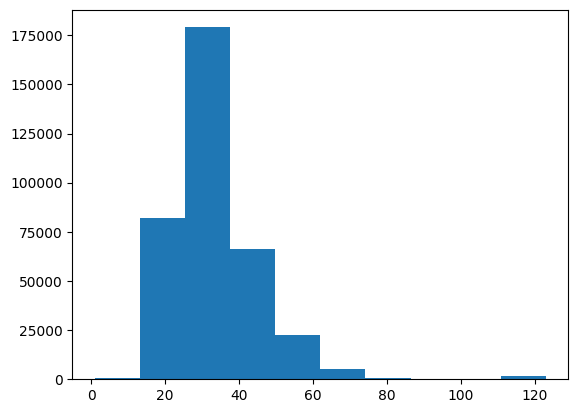

In [ ]:
plt.hist(df['edad_cliente'])

In [ ]:
# Crear el DataFrame con la columna de datos
#df = pd.DataFrame(df['edad_cliente'], columns=['Edades'])

# Calcular la frecuencia de cada valor
tabla_frecuencias = df['edad_cliente'].value_counts().reset_index()

# Renombrar las columnas
tabla_frecuencias.columns = ['Edades', 'Frecuencia']

# Ordenar los valores por orden ascendente
tabla_frecuencias = tabla_frecuencias.sort_values('Edades')

print(tabla_frecuencias)
tabla_frecuencias.to_excel("tablaEdad.xlsx", index=False)

    Edades  Frecuencia
58     1.0         184
78     3.0           8
68     4.0          58
69     5.0          50
73     6.0          35
..     ...         ...
63    78.0          86
74    79.0          24
79    82.0           2
65    83.0          82
37   123.0        1895

[80 rows x 2 columns]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fde634c0c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde634c34c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde634c1f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde634c1ba0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde634c2230>],
 'means': []}

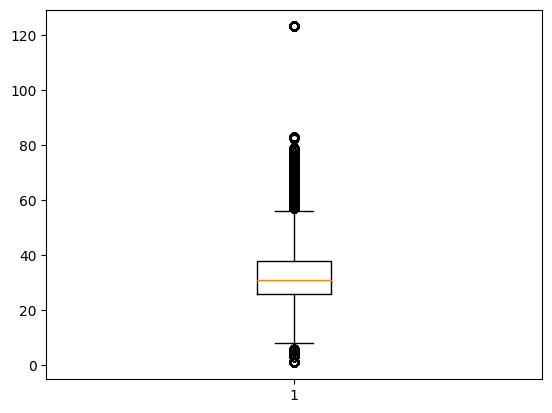

In [ ]:
plt.boxplot(df['edad_cliente'])

entre 1 y 5 no es posible

([<matplotlib.patches.Wedge at 0x7fde63344850>,
 [Text(0.8205352753312497, 0.7326130369690882, 'SALONES DE BELLEZA'),
  Text(-0.46835717599151955, 0.995309778760989, 'GASOLINERAS'),
  Text(-1.098610649223933, 0.05526881047904595, 'RETAIL'),
  Text(-0.7011664252267304, -0.847564536855317, 'RESTAURANTE'),
  Text(0.013822620391950539, -1.0999131489192682, 'AGREGADOR'),
  Text(0.48082732404914436, -0.9893457860868157, 'MEDICOS Y DENTISTAS'),
  Text(0.7117615366820849, -0.8386867799720926, 'SUPERMERCADOS'),
  Text(0.8563085114896598, -0.6904605225140416, 'COMIDA RAPIDA'),
  Text(0.943279304805848, -0.5658835155091517, 'FARMACIAS'),
  Text(1.0011165545025018, -0.45581316819618073, 'TELECOMUNICACIONES'),
  Text(1.0418081269167572, -0.3530379960998509, 'OTROS'),
  Text(1.071979555249402, -0.24669785797062396, 'GOBIERNO'),
  Text(1.0895075657190418, -0.1515693380633697, 'TRANSPORTE TERRESTRE DE PASAJEROS'),
  Text(1.0968747890202037, -0.0828595028459836, 'ENTRETENIMIENTO'),
  Text(1.09921841934

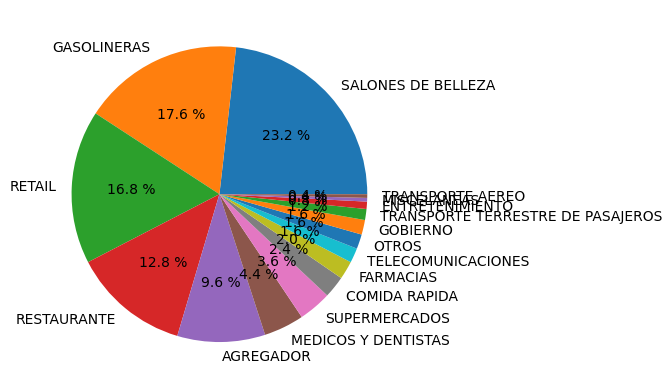

In [ ]:
niños = df[df['edad_cliente'] < 5]
plt.pie(niños["giro_nombre"].value_counts(), labels=niños['giro_nombre'].unique(), autopct="%0.1f %%")

([<matplotlib.patches.Wedge at 0x7f9371d81db0>,
 [Text(-0.4510546469426829, 1.0032695078947689, 'CARD PRESENT'),
  Text(0.45105474087555125, -1.003269465663981, 'CARD NOT PRESENT')],
 [Text(-0.24602980742328154, 0.5472379133971467, '63.4 %'),
  Text(0.24602985865939156, -0.5472378903621713, '36.6 %')])

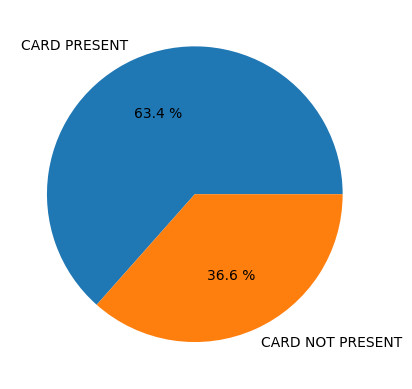

In [188]:
plt.pie(df["entry_mode"].value_counts(), labels=df['entry_mode'].unique(), autopct="%0.1f %%")

In [ ]:
# De la grafica podemos ve rcomprar irreales de un niño de 1 a 5 años

123 tampoco es posible

([<matplotlib.patches.Wedge at 0x7fde631cf700>,
 [Text(0.9026044833544431, 0.6287329692551992, 'TRANSPORTE TERRESTRE DE PASAJEROS'),
  Text(-0.12827239612957714, 1.09249539696567, 'OTROS'),
  Text(-0.922951244388026, 0.5984655382581311, 'MISCELANEAS'),
  Text(-1.0783042923290345, -0.21739331439761517, 'RETAIL'),
  Text(-0.66631718547548, -0.8752264897385333, 'AGREGADOR'),
  Text(-0.14275003747607956, -1.090698137341665, 'GASOLINERAS'),
  Text(0.19859103909155779, -1.0819249508133804, 'SUPERMERCADOS'),
  Text(0.49328677584464875, -0.983192838041852, 'TELECOMUNICACIONES'),
  Text(0.7337822070617914, -0.8194898855992833, 'FARMACIAS'),
  Text(0.9139194666109149, -0.6121692646234544, 'GOBIERNO'),
  Text(1.0119407452435691, -0.4312492644815642, 'COMIDA RAPIDA'),
  Text(1.0581109040822498, -0.300668113810301, 'REFACCIONES Y FERRETERIA'),
  Text(1.0830590548083423, -0.19230986401550018, 'ENTRETENIMIENTO'),
  Text(1.091508064504214, -0.13641900572231563, 'RESTAURANTE'),
  Text(1.094194432593585

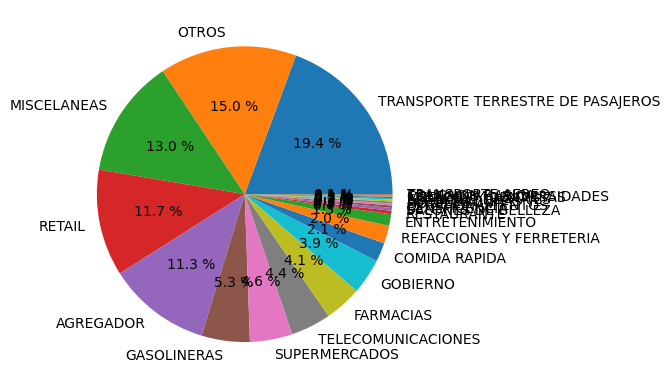

In [ ]:
inmortales = df[df['edad_cliente'] == 123]
plt.pie(inmortales["giro_nombre"].value_counts(), labels=inmortales['giro_nombre'].unique(), autopct="%0.1f %%")

In [ ]:
# por el simple hecho de tener 123 no es posible

Entre 60 y 80 puede ser posible

([<matplotlib.patches.Wedge at 0x7fde6314de70>,
 [Text(0.7377569539514132, 0.8159134003657084, 'FARMACIAS'),
  Text(-0.6420437485753676, 0.8931852131082838, 'SUPERMERCADOS'),
  Text(-1.0808103640912101, 0.20457017591287863, 'TRANSPORTE TERRESTRE DE PASAJEROS'),
  Text(-1.0598606048470467, -0.2944409928886477, 'MISCELANEAS'),
  Text(-0.8476748149068195, -0.701033100625562, 'GOBIERNO'),
  Text(-0.5227184587475521, -0.9678664230587731, 'AGREGADOR'),
  Text(-0.14334037652055684, -1.0906207115486781, 'RESTAURANTE'),
  Text(0.21731007376845626, -1.0783210708498412, 'RETAIL'),
  Text(0.4971608636352336, -0.9812395607951551, 'COMIDA RAPIDA'),
  Text(0.6962055185243683, -0.8516442191292181, 'OTROS'),
  Text(0.840585184600823, -0.7095185321255537, 'TELECOMUNICACIONES'),
  Text(0.9438566428061904, -0.5649200278186529, 'GASOLINERAS'),
  Text(1.015252697833283, -0.42339338627597944, 'ENTRETENIMIENTO'),
  Text(1.064362066098687, -0.277728990654801, 'BENEFICENCIA'),
  Text(1.0850224314051244, -0.1809

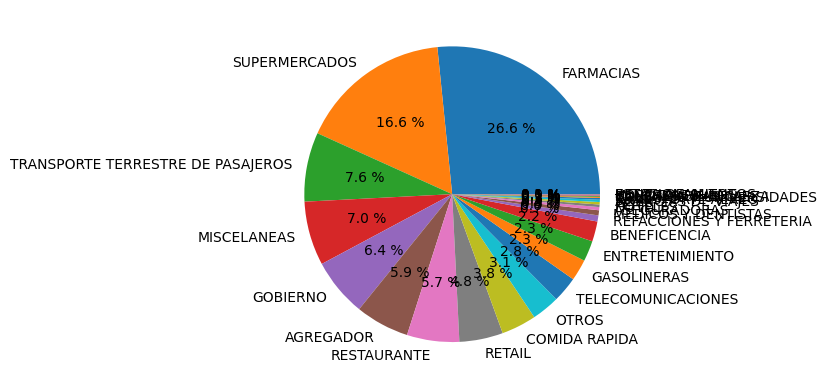

In [ ]:
viejitos = df[(df['edad_cliente'] >= 60) & (df['edad_cliente'] <= 90)]
plt.pie(viejitos["giro_nombre"].value_counts(), labels=viejitos['giro_nombre'].unique(), autopct="%0.1f %%")
# Viendo las categorias en las que se compran, si es posible que un vijeito compre super y medicamentos

Distrubucion de pais de transaccion

([<matplotlib.patches.Wedge at 0x7f00c74e58a0>,
 [Text(-1.0839450140371183, 0.18725171973595187, 'MX'),
  Text(1.0614530553910686, -0.2886475553351622, 'NL'),
  Text(1.086098058500832, -0.17433016755777928, 'BE'),
  Text(1.0932101108467964, -0.12203136294549523, 'US'),
  Text(1.0959706563603921, -0.09406551119816137, 'GB'),
  Text(1.097213821158005, -0.07824212842100953, 'IE'),
  Text(1.0980373147777442, -0.06568146889101192, 'HK'),
  Text(1.0984934900978742, -0.05755043190621244, 'PL'),
  Text(1.0987591174001827, -0.052234106960603766, 'AU'),
  Text(1.0989324305190695, -0.048451141921017925, 'ES'),
  Text(1.0990872188463676, -0.0448027384046648, 'MY'),
  Text(1.0992277245963011, -0.04121176384042181, 'AE'),
  Text(1.0993551755659414, -0.0376589691358916, 'LU'),
  Text(1.0994618175329125, -0.03440511280645415, 'BR'),
  Text(1.0995486483835886, -0.03150825031358553, 'MT'),
  Text(1.0996215382793038, -0.02885260044186053, 'CH'),
  Text(1.099678276528619, -0.026602408369288212, 'EE'),
  T

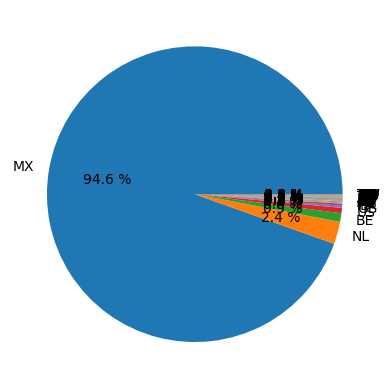

In [6]:
plt.pie(df["ope_pais"].value_counts(), labels=df['ope_pais'].unique(), autopct="%0.1f %%")

In [7]:
df['ope_pais'].value_counts()

MX    338240
US      8723
GB      3388
NL      2076
IE       833
       ...  
SV         1
UA         1
JM         1
KW         1
MD         1
Name: ope_pais, Length: 77, dtype: int64

In [11]:
df[df['ope_pais'] == 'NL']
# Este dato parecia incorrecto, por 'NL' de Nuevo Leon, pero se realizo una investigacion y 'NL' es un pais es
# paises bajos, ademas que el nombre de comercio es en amsterdam

,tipo_transaccion,nombre_comercio,giro_nombre,mcc_nombre,fecha_transaccion,ope_pais,entry_mode,sexo_cliente,estado_cliente,edad_cliente,monto_transaccion,id_cliente,fecha_transaccion
13,TDC,PAYPAL *UBERBV EATS 35314369001,RESTAURANTE,RESTAURANTES,2022-11-24 19:53:00,NL,CARD NOT PRESENT,M,YUCATAN,33.0,106.76,9388,2022-11-24 19:53:00
220,TDC,PAYPAL *UBER BV 35314369001,TRANSPORTE TERRESTRE DE PASAJEROS,"LIMOSINAS, (TAXIS)",2023-01-26 21:23:00,NL,CARD NOT PRESENT,M,MICHOACAN DE OCAMPO,29.0,29.89,3515,2023-01-26 21:23:00
548,TDD,PAYPAL *UBER BV 35314369001,TRANSPORTE TERRESTRE DE PASAJEROS,"LIMOSINAS, (TAXIS)",2022-11-09 11:13:00,NL,CARD NOT PRESENT,F,CIUDAD DE MEXICO,36.0,89.75,3596,2022-11-09 11:13:00
689,TDC,UBR* PENDING.UBER.COM Amsterdam,TRANSPORTE TERRESTRE DE PASAJEROS,"LIMOSINAS, (TAXIS)",2022-12-03 18:41:00,NL,CARD NOT PRESENT,M,HIDALGO,38.0,23.28,3848,2022-12-03 18:41:00
720,TDC,PAYPAL *UBER BV 35314369001,TRANSPORTE TERRESTRE DE PASAJEROS,"LIMOSINAS, (TAXIS)",2022-12-30 20:36:00,NL,CARD NOT PRESENT,M,NUEVO LEON,24.0,41.36,8344,2022-12-30 20:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355969,TDC,IHERB IHERB.COM cdkTR iherb.com,RETAIL,"TIENDAS DE CONVENIENCIA, MINISUPER",2023-01-17 17:32:00,NL,CARD NOT PRESENT,M,MEXICO,36.0,533.44,8518,2023-01-17 17:32:00
356095,TDC,UBER * EATS PENDING Amsterdam,RESTAURANTE,RESTAURANTES,2022-12-03 13:10:00,NL,CARD NOT PRESENT,M,GUERRERO,43.0,640.45,1433,2022-12-03 13:10:00
356436,TDD,Hotel at Booking.com Amsterdam,HOTELES,"SERV NO CLASIFICADOS HOTELES, MOTELES,CTROS TU...",2023-03-06 20:25:00,NL,CARD NOT PRESENT,F,CIUDAD DE MEXICO,74.0,578.90,9187,2023-03-06 20:25:00
356980,TDC,Booking Xperiences Amsterdam,OTROS,EXHIBICIONES Y ATRACCIONES TURISTICAS,2023-01-13 21:44:00,NL,CARD NOT PRESENT,M,NUEVO LEON,39.0,534.30,5048,2023-01-13 21:44:00


In [10]:
df[df['ope_pais'] == 'GB'].head()
# No es incorrecto, los nombres d ecomercio iguakmente son desde Great Britain

,tipo_transaccion,nombre_comercio,giro_nombre,mcc_nombre,fecha_transaccion,ope_pais,entry_mode,sexo_cliente,estado_cliente,edad_cliente,monto_transaccion,id_cliente,fecha_transaccion
146,TDD,OF London,OTROS,"MERCADEO DIRECTO, SERVICIOS POR TELEFONO.",2022-11-24 22:56:00,GB,CARD NOT PRESENT,M,MEXICO,20.0,121.49,8208,2022-11-24 22:56:00
153,TDD,OF London,OTROS,"MERCADEO DIRECTO, SERVICIOS POR TELEFONO.",2022-11-22 09:43:00,GB,CARD NOT PRESENT,M,MORELOS,27.0,111.50,9799,2022-11-22 09:43:00
178,TDD,OF London,OTROS,"MERCADEO DIRECTO, SERVICIOS POR TELEFONO.",2023-01-13 18:46:00,GB,CARD NOT PRESENT,M,NAYARIT,26.0,42.59,8493,2023-01-13 18:46:00
187,TDD,YouTube London,ENTRETENIMIENTO,"RENTA DE VIDEOS (VIDEOS),",2023-01-12 18:20:00,GB,CARD NOT PRESENT,M,MICHOACAN DE OCAMPO,23.0,69.33,1302,2023-01-12 18:20:00
292,TDD,OF London,OTROS,"MERCADEO DIRECTO, SERVICIOS POR TELEFONO.",2023-01-10 17:45:00,GB,CARD NOT PRESENT,M,MORELOS,21.0,184.18,2293,2023-01-10 17:45:00


Distrubcion de giros de negocio

Text(0, 0.5, 'frecuencia')

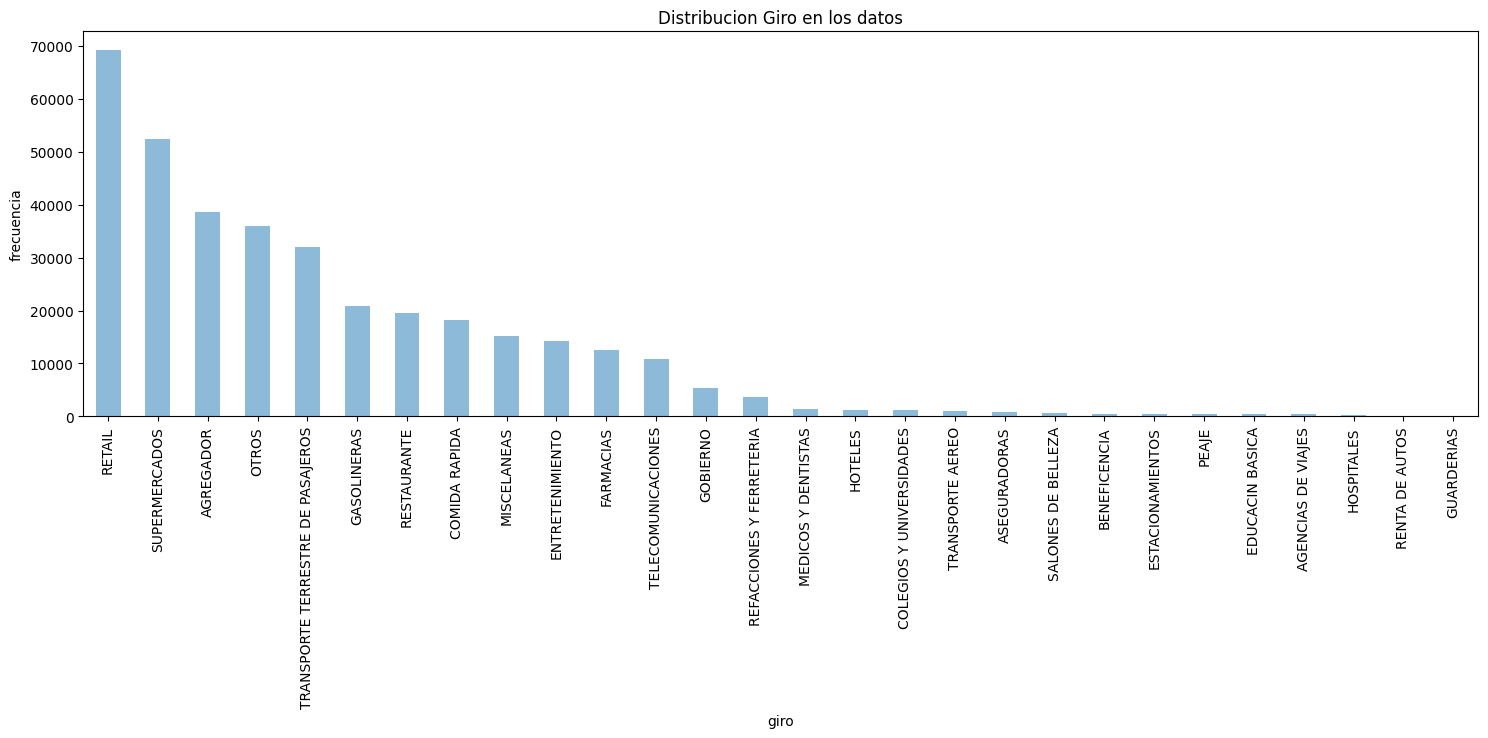

In [5]:
f, ax = plt.subplots(figsize=(18,5))
df['giro_nombre'].value_counts().plot(kind="bar", alpha = 0.5)
plt.title("Distribucion Giro en los datos")
plt.xlabel("giro")
plt.ylabel("frecuencia")

Corregir edades

In [ ]:
# Filtrar el DataFrame por una categoría específica
categoria_seleccionada = df['giro_nombre'].unique()
#df_categoria = df[df['giro_nombre'] == categoria_seleccionada]

# Calcular la moda de la edad para la categoría seleccionada
#moda_edad = df_categoria['edad_cliente'].mode().values[0]

for i in categoria_seleccionada:
  df_categoria = df[df['giro_nombre'] == i]
  moda_edad = df_categoria['edad_cliente'].mode().values[0]
  print(i)
  print(moda_edad)
  print('\n')

FARMACIAS
31.0


RETAIL
27.0


TELECOMUNICACIONES
25.0


COMIDA RAPIDA
25.0


OTROS
27.0


GASOLINERAS
27.0


AGREGADOR
27.0


MISCELANEAS
31.0


RESTAURANTE
27.0


SUPERMERCADOS
31.0


TRANSPORTE TERRESTRE DE PASAJEROS
27.0


GOBIERNO
30.0


ENTRETENIMIENTO
31.0


AGENCIAS DE VIAJES
23.0


REFACCIONES Y FERRETERIA
27.0


ESTACIONAMIENTOS
33.0


PEAJE
29.0


TRANSPORTE AEREO
31.0


MEDICOS Y DENTISTAS
34.0


BENEFICENCIA
32.0


EDUCACIN BASICA
31.0


COLEGIOS Y UNIVERSIDADES
20.0


SALONES DE BELLEZA
35.0


HOSPITALES
26.0


HOTELES
30.0


ASEGURADORAS
31.0


RENTA DE AUTOS
35.0


GUARDERIAS
24.0




In [ ]:
moda_por_categoria = df.groupby('giro_nombre')['edad_cliente'].agg(lambda x: x.mode().values[0])
Y = pd.DataFrame(moda_por_categoria)
Y

,edad_cliente
giro_nombre,
AGENCIAS DE VIAJES,23.0
AGREGADOR,27.0
ASEGURADORAS,31.0
BENEFICENCIA,32.0
COLEGIOS Y UNIVERSIDADES,20.0
COMIDA RAPIDA,25.0
EDUCACIN BASICA,31.0
ENTRETENIMIENTO,31.0
ESTACIONAMIENTOS,33.0


In [ ]:
Y.to_excel('modaEdadPorCategoria.xlsx', index=True)

In [ ]:
dict_categoria_id = niños.groupby('id_cliente')['giro_nombre'].agg(lambda x: x.mode().values[0]).to_dict()
dict_categoria_numero = Y.to_dict()

{'edad_cliente': {'AGENCIAS DE VIAJES': 23.0,
  'AGREGADOR': 27.0,
  'ASEGURADORAS': 31.0,
  'BENEFICENCIA': 32.0,
  'COLEGIOS Y UNIVERSIDADES': 20.0,
  'COMIDA RAPIDA': 25.0,
  'EDUCACIN BASICA': 31.0,
  'ENTRETENIMIENTO': 31.0,
  'ESTACIONAMIENTOS': 33.0,
  'FARMACIAS': 31.0,
  'GASOLINERAS': 27.0,
  'GOBIERNO': 30.0,
  'GUARDERIAS': 24.0,
  'HOSPITALES': 26.0,
  'HOTELES': 30.0,
  'MEDICOS Y DENTISTAS': 34.0,
  'MISCELANEAS': 31.0,
  'OTROS': 27.0,
  'PEAJE': 29.0,
  'REFACCIONES Y FERRETERIA': 27.0,
  'RENTA DE AUTOS': 35.0,
  'RESTAURANTE': 27.0,
  'RETAIL': 27.0,
  'SALONES DE BELLEZA': 35.0,
  'SUPERMERCADOS': 31.0,
  'TELECOMUNICACIONES': 25.0,
  'TRANSPORTE AEREO': 31.0,
  'TRANSPORTE TERRESTRE DE PASAJEROS': 27.0}}

In [ ]:
dict_categoria_id

{5: 'SUPERMERCADOS',
 1410: 'AGREGADOR',
 2617: 'RESTAURANTE',
 2702: 'RETAIL',
 2710: 'GASOLINERAS',
 2895: 'GASOLINERAS',
 5530: 'GASOLINERAS',
 6458: 'SUPERMERCADOS'}

Corregir las edades con la moda de sus transacciones y rellenar la edad erronaea con la moda de la categoria en la que mas veces gastan

In [ ]:
id_kid = niños['id_cliente'].unique()
edades_kid = [27,31,31,27,27,27,27]

In [ ]:
for id, edad in zip(id_kid, edades_kid):
    df.loc[df['id_cliente'] == id, 'edad_cliente'] = edad

In [ ]:
id_v = inmortales['id_cliente'].unique()

In [ ]:
inmortales.groupby('id_cliente')['giro_nombre'].agg(lambda x: x.mode().values[0])

id_cliente
106                           GASOLINERAS
136                                 OTROS
330                                RETAIL
1128                            AGREGADOR
1461                                OTROS
1502                          MISCELANEAS
1640                               RETAIL
1719                                OTROS
2098                               RETAIL
2429                            AGREGADOR
2544                               RETAIL
2647                                OTROS
2963    TRANSPORTE TERRESTRE DE PASAJEROS
3446                               RETAIL
3659                          RESTAURANTE
3700                               RETAIL
4273                        SUPERMERCADOS
4544                            AGREGADOR
4713                            AGREGADOR
4831                            AGREGADOR
5214                               RETAIL
5865                      ENTRETENIMIENTO
6002                          MISCELANEAS
6280                   

In [ ]:
edades_v = [27, 27, 27, 31, 27, 27,27,27,27,27,27,27,27,27,27,27,27,31,27,27,27,31,27,27,27,27,27,27,27,27,27,31,31,27,27,27,27,27,27,27,27,31,27]

for id, edad in zip(id_v, edades_v):
    df.loc[df['id_cliente'] == id, 'edad_cliente'] = edad


(array([   271.,  14980., 120130., 116737.,  54145.,  28704.,  15563.,
          5257.,   1656.,    275.]),
 array([ 5. , 12.8, 20.6, 28.4, 36.2, 44. , 51.8, 59.6, 67.4, 75.2, 83. ]),
 <BarContainer object of 10 artists>)

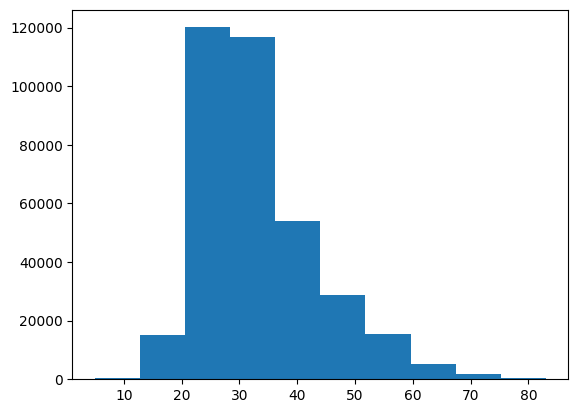

In [ ]:
plt.hist(df['edad_cliente'])

In [ ]:
df.to_csv('DF_edadedlimpias.csv', index=False)

# Correlaciones

Correlacion entre edad y sumatoria del monto gastado

In [149]:
df = pd.read_csv('DF_edadedlimpias.csv')

In [150]:
# vemos cuantos ids unicos hay
len(df['id_cliente'].unique())

10000

In [151]:
# variables numericas
df_suma = df.groupby('id_cliente')['monto_transaccion'].sum().reset_index()


In [152]:
df_suma.shape
# si coincide

(10000, 2)

In [153]:
df_suma.head()

,id_cliente,monto_transaccion
0,1,573.40
1,2,3136.71
2,3,1831.04
3,4,2519.50
4,5,12032.69


In [154]:
df_prueba = df.drop_duplicates(subset='id_cliente')
# hacemos un dummy elimindando registros duplicados

In [155]:
df_prueba.shape

(10000, 13)

In [156]:
df_suma = df_suma.merge(df_prueba[['id_cliente','edad_cliente', 'estado_cliente', 'tipo_transaccion', 'entry_mode', 'sexo_cliente']], on='id_cliente', how='left')

In [157]:
df_suma.shape

(10000, 7)

In [158]:
df_suma.head()

,id_cliente,monto_transaccion,edad_cliente,estado_cliente,tipo_transaccion,entry_mode,sexo_cliente
0,1,573.40,38.0,VERACRUZ DE IGNACIO DE LA LLAV,TDD,CARD NOT PRESENT,F
1,2,3136.71,28.0,GUERRERO,TDD,CARD NOT PRESENT,F
2,3,1831.04,45.0,COAHUILA DE ZARAGOZA,TDD,CARD PRESENT,M
3,4,2519.50,51.0,NUEVO LEON,TDD,CARD NOT PRESENT,M
4,5,12032.69,27.0,MEXICO,TDD,CARD PRESENT,


In [159]:
dummy_suma = df_suma

(array([  22.,  496., 3481., 3097., 1427.,  805.,  452.,  160.,   49.,
          11.]),
 array([ 5. , 12.8, 20.6, 28.4, 36.2, 44. , 51.8, 59.6, 67.4, 75.2, 83. ]),
 <BarContainer object of 10 artists>)

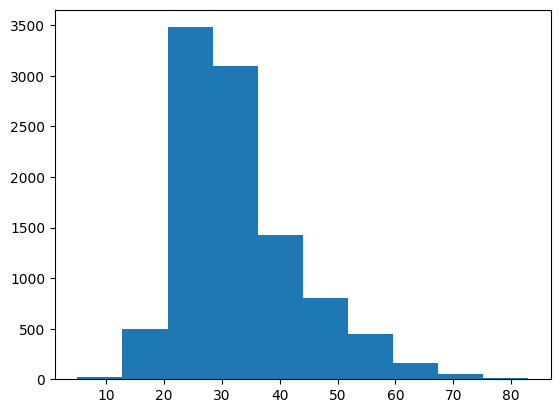

In [21]:
plt.hist(df_suma['edad_cliente'])

Text(0, 0.5, 'frecuencia')

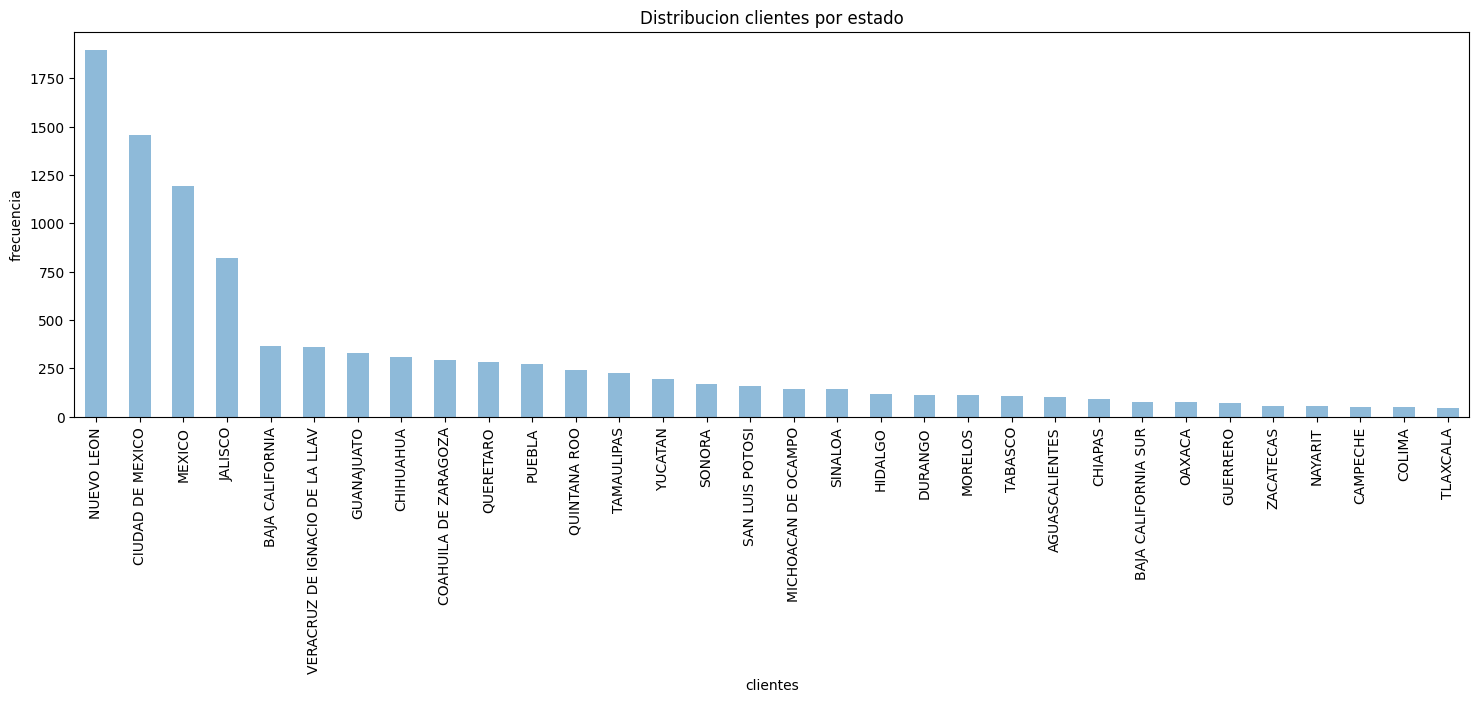

In [ ]:
f, ax = plt.subplots(figsize=(18,5))
df_suma['estado_cliente'].value_counts().plot(kind="bar", alpha = 0.5)
plt.title("Distribucion clientes por estado")
plt.xlabel("clientes")
plt.ylabel("frecuencia")

In [ ]:
df_suma['monto_transaccion'].corr(df_suma['edad_cliente'])
# este numero indica que hay muy poca correlacion entre la edad de cliente y la sumatoria de
# sus montos de transcaccion pero todavia se puede analizar si lo dividimos entre credito y debito

0.10889199972001594

Correlacion de edad y de la sumatoria de sus gastos (dividiendo credito y debito)




In [ ]:
Credito = df[df['tipo_transaccion'] == 'TDC']
Credito_suma = Credito.groupby('id_cliente')['monto_transaccion'].sum().reset_index()
Credito_suma.shape

(5064, 2)

In [ ]:
df_prueba_c = df[df['tipo_transaccion'] == 'TDC']
df_prueba_c = df_prueba_c.drop_duplicates(subset='id_cliente')
df_prueba_c.shape

(5064, 13)

In [ ]:
df_suma_c = Credito_suma.merge(df_prueba_c[['id_cliente','edad_cliente']], on='id_cliente', how='left')

In [ ]:
df_suma_c['monto_transaccion'].corr(df_suma_c['edad_cliente'])

0.10728715319503303

In [ ]:
Debito = df[df['tipo_transaccion'] == 'TDD']
Debito_suma = Debito.groupby('id_cliente')['monto_transaccion'].sum().reset_index()
Debito_suma.shape

(7752, 2)

In [ ]:
df_prueba_d = df[df['tipo_transaccion'] == 'TDD']
df_prueba_d = df_prueba_d.drop_duplicates(subset='id_cliente')
df_prueba_d.shape

(7752, 13)

In [ ]:
df_suma_d = Debito_suma.merge(df_prueba_d[['id_cliente','edad_cliente']], on='id_cliente', how='left')

In [ ]:
df_suma_d['monto_transaccion'].corr(df_suma_d['edad_cliente'])

0.08810480494877244

Correlacion categoria y monto gastado

In [ ]:
# hacemos binarias los tipo de transcaccion

datos = pd.get_dummies(df['tipo_transaccion'])

df['TDC'] = datos['TDC'].to_list()
df['TDD'] = datos['TDD'].to_list()

In [ ]:
df.groupby('giro_nombre')['monto_transaccion'].corr(df['TDD'])
# no hay correlacion entre el giro del negocio la cantidad y el tipo de tarjeta
# exceptuando las guarderias, que al ser negativa, singifica que se paga en credito.

giro_nombre
AGENCIAS DE VIAJES                  -0.225705
AGREGADOR                           -0.194471
ASEGURADORAS                        -0.065587
BENEFICENCIA                        -0.043633
COLEGIOS Y UNIVERSIDADES            -0.031731
COMIDA RAPIDA                       -0.055961
EDUCACIN BASICA                     -0.150741
ENTRETENIMIENTO                     -0.111365
ESTACIONAMIENTOS                    -0.099131
FARMACIAS                           -0.163356
GASOLINERAS                         -0.243099
GOBIERNO                            -0.058853
GUARDERIAS                           0.729820
HOSPITALES                          -0.133918
HOTELES                             -0.148181
MEDICOS Y DENTISTAS                 -0.155690
MISCELANEAS                         -0.185071
OTROS                               -0.175493
PEAJE                               -0.181950
REFACCIONES Y FERRETERIA            -0.131814
RENTA DE AUTOS                      -0.156089
RESTAURANTE           

In [56]:
# acceder a la moda del id 1
dict_categoria_id[1]

'OTROS'

Correlacion entre el monto y tipo transaccion

In [133]:
df_suma['TDC'].corr(df_suma['monto_transaccion'])
# Hay muy poca relacion entre las transacciones y el tipo de la misma

0.14659390740158781

In [ ]:
#df_suma_d['TDD'] = 1
df_suma_d['monto_transaccion'].corr(df_suma_d['TDD'])

df_suma_c['TDD'] = 0
juntos_sumas = pd.concat([df_suma_d, df_suma_c])
juntos_sumas['TDD'].corr(juntos_sumas['monto_transaccion'])

-0.1709612276587036

# Transformacion de datos

Transformar datos ya con la sumatoria de sus gastos

In [160]:
dict_categoria_id = df.groupby('id_cliente')['giro_nombre'].agg(lambda x: x.mode().values[0])
# la moda de cada cliente id
dict_categoria_id

id_cliente
1                OTROS
2        SUPERMERCADOS
3               RETAIL
4            AGREGADOR
5        SUPERMERCADOS
             ...      
9996     SUPERMERCADOS
9997         AGREGADOR
9998       GASOLINERAS
9999     SUPERMERCADOS
10000           RETAIL
Name: giro_nombre, Length: 10000, dtype: object

In [161]:
def obtener_valor(id):
    if id in dict_categoria_id:
        return dict_categoria_id[id]
    else:
        return pd.NA

# Crear la nueva columna utilizando la función personalizada
df_suma['Moda_giro'] = df_suma['id_cliente'].apply(obtener_valor)

In [162]:
df_suma

,id_cliente,monto_transaccion,edad_cliente,estado_cliente,tipo_transaccion,entry_mode,sexo_cliente,Moda_giro
0,1,573.40,38.0,VERACRUZ DE IGNACIO DE LA LLAV,TDD,CARD NOT PRESENT,F,OTROS
1,2,3136.71,28.0,GUERRERO,TDD,CARD NOT PRESENT,F,SUPERMERCADOS
2,3,1831.04,45.0,COAHUILA DE ZARAGOZA,TDD,CARD PRESENT,M,RETAIL
3,4,2519.50,51.0,NUEVO LEON,TDD,CARD NOT PRESENT,M,AGREGADOR
4,5,12032.69,27.0,MEXICO,TDD,CARD PRESENT,,SUPERMERCADOS
...,...,...,...,...,...,...,...,...
9995,9996,10825.61,24.0,QUERETARO,TDC,CARD PRESENT,M,SUPERMERCADOS
9996,9997,278.35,48.0,NUEVO LEON,TDD,CARD PRESENT,M,AGREGADOR
9997,9998,495.32,23.0,JALISCO,TDC,CARD PRESENT,M,GASOLINERAS
9998,9999,1644.14,29.0,VERACRUZ DE IGNACIO DE LA LLAV,TDC,CARD PRESENT,M,SUPERMERCADOS


In [20]:
#df = df.drop('nombre_comercio', axis=1)
#df = df.drop('fecha_transaccion', axis = 1)

In [23]:
#df = df.drop('fecha_transaccion ', axis=1)

In [163]:
df_suma['sexo_cliente'].value_counts()

df_suma[df_suma['sexo_cliente'] == " "]

df_suma.replace({' ': 'F'}, inplace=True) # vamos a rellenar con la moda
df_suma['sexo_cliente'].value_counts()

M    6643
F    3357
Name: sexo_cliente, dtype: int64

In [164]:
# variable de tipo de transaccion
transaccion_dummies = pd.get_dummies(df_suma['tipo_transaccion'])
df_suma['TDC'] = transaccion_dummies['TDC'].to_list()
df_suma['TDD'] = transaccion_dummies['TDD'].to_list()
df_suma = df_suma.drop('tipo_transaccion', axis=1)
# variable sexo 
sexo_dummies = pd.get_dummies(df_suma['sexo_cliente'])
df_suma['F'] = sexo_dummies['F'].to_list()
df_suma['M'] = sexo_dummies['M'].to_list()
df_suma = df_suma.drop('sexo_cliente', axis=1)

In [165]:
# entry mode
entry_dum = pd.get_dummies(df_suma['entry_mode'])
df_suma['Presente'] = entry_dum['CARD PRESENT'].to_list()
df_suma['Digital'] = entry_dum['CARD NOT PRESENT'].to_list()
df_suma = df_suma.drop('entry_mode', axis=1)

In [11]:
#df.to_csv('DFedadesSexo.csv', index=False)

In [166]:
# estado
count_dict = df_suma['estado_cliente'].value_counts().to_dict()

# Aplicar count encoding a la columna
df_suma['estado_cliente'] = df_suma['estado_cliente'].map(count_dict)

df_suma['estado_cliente'] = df_suma['estado_cliente'].astype(int)

df_suma.head(2)

,id_cliente,monto_transaccion,edad_cliente,estado_cliente,Moda_giro,TDC,TDD,F,M,Presente,Digital
0,1,573.40,38.0,362,OTROS,0,1,1,0,0,1
1,2,3136.71,28.0,72,SUPERMERCADOS,0,1,1,0,0,1


In [167]:
#categoria
count_dict = df_suma['Moda_giro'].value_counts().to_dict()

#Aplicar count encoding a la columna
df_suma['Moda_giro'] = df_suma['Moda_giro'].map(count_dict)

df_suma['Moda_giro'] = df_suma['Moda_giro'].astype(int)

In [28]:
#df = df.drop('mcc_nombre', axis=1)
#df = df.drop('ope_pais', axis=1)

In [168]:
df_suma

,id_cliente,monto_transaccion,edad_cliente,estado_cliente,Moda_giro,TDC,TDD,F,M,Presente,Digital
0,1,573.40,38.0,362,1295,0,1,1,0,0,1
1,2,3136.71,28.0,72,1671,0,1,1,0,0,1
2,3,1831.04,45.0,295,2360,0,1,0,1,1,0
3,4,2519.50,51.0,1895,1336,0,1,0,1,0,1
4,5,12032.69,27.0,1192,1671,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,10825.61,24.0,286,1671,1,0,0,1,1,0
9996,9997,278.35,48.0,1895,1336,0,1,0,1,1,0
9997,9998,495.32,23.0,821,538,1,0,0,1,1,0
9998,9999,1644.14,29.0,362,1671,1,0,0,1,1,0


# Modelo

Intento de modeo

In [137]:
from sklearn.cluster import KMeans
X = df_suma[['edad_cliente', 'monto_transaccion']]

# Crear instancia del modelo K-means con 5 clusters
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

# Obtener los centroides y las etiquetas de los clusters
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

# Imprimir los resultados
print("Centroides:")
for centroide in centroides:
    print(centroide)

print("Etiquetas de los clusters:")
print(etiquetas)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides:
[   34.17421603 13737.30796167]
[  32.48621554 2906.29928822]
[3.71428571e+01 3.93898292e+04]
[  33.4701087  7572.23210145]
[   35.15708812 23047.25651341]
[  31.97211538 1031.38101923]
[   33.41002571 10484.88532134]
[  32.81351527 5056.81426901]
[   35.65420561 17812.89007009]
[   37.50724638 29840.35355072]
Etiquetas de los clusters:
[5 1 5 ... 5 5 5]


In [138]:
len(etiquetas)

10000

Text(0.5, 0, 'edad')

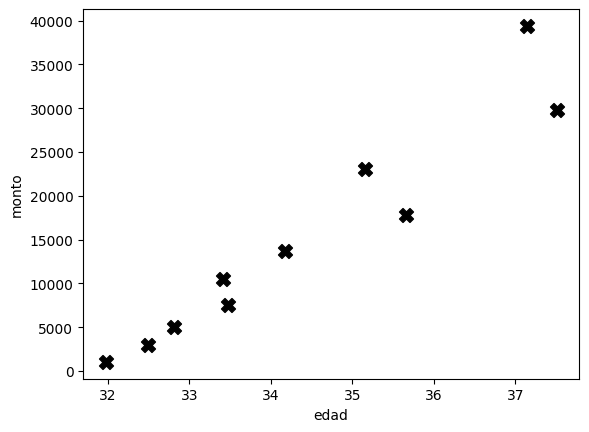

In [141]:
import matplotlib.pyplot as plt
# Graficar los puntos de datos por cluster
#for i in range(len(X)):
 # plt.scatter(X[i, 0], X[i, 1], c='C' + str(etiquetas[i]))

# Graficar los centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=100)
plt.ylabel('monto')
plt.xlabel('edad')

In [202]:
from sklearn.cluster import KMeans
X = df_suma[['Moda_giro', 'monto_transaccion']]

# Crear instancia del modelo K-means con 5 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Obtener los centroides y las etiquetas de los clusters
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

# Imprimir los resultados
print("Centroides:")
for centroide in centroides:
    print(centroide)

print("Etiquetas de los clusters:")
print(etiquetas)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides:
[1390.39753639 7397.44284434]
[ 1492.85026738 28757.3307754 ]
[1270.41656409 2022.76941797]
[ 1438.68888889 15367.38965873]
Etiquetas de los clusters:
[2 2 2 ... 2 2 2]


Text(0.5, 0, 'giro')

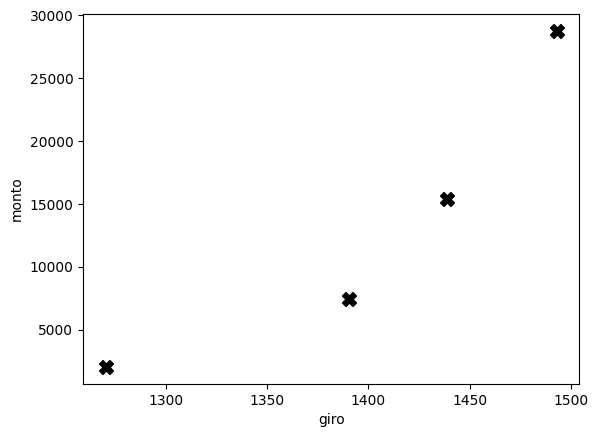

In [203]:
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=100)
plt.ylabel('monto')
plt.xlabel('giro')

In [173]:
df_nuevo = pd.DataFrame()
df_nuevo['giro_nombre'] = dummy_suma['Moda_giro']
df_nuevo['giro_num'] = df_suma['Moda_giro']
df_nuevo = df_nuevo.drop_duplicates()
df_nuevo.to_excel('Signficado.xlsx', index=False)

In [180]:
from sklearn.cluster import KMeans
X = df_suma[['edad_cliente', 'Moda_giro']]

# Crear instancia del modelo K-means con 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Obtener los centroides y las etiquetas de los clusters
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

# Imprimir los resultados
print("Centroides:")
for centroide in centroides:
    print(centroide)

print("Etiquetas de los clusters:")
print(etiquetas)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides:
[ 33.40714286 256.12346939]
[  32.16949153 2360.        ]
[  31.60205245 1315.81946028]
[  36.43087971 1671.        ]
[ 32.04354136 722.09288824]
Etiquetas de los clusters:
[2 3 1 ... 4 3 1]


Text(0.5, 0, 'edad')

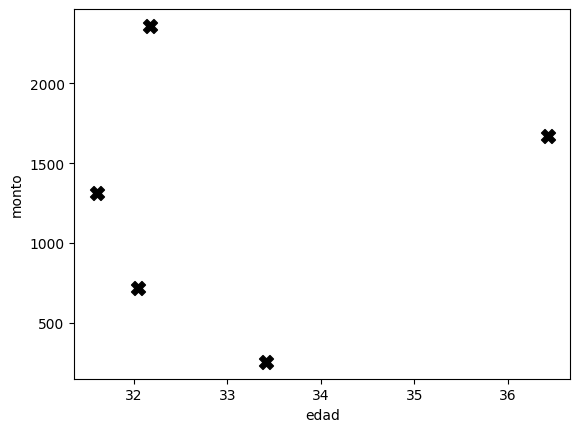

In [182]:
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=100)
plt.ylabel('monto')
plt.xlabel('edad')

In [191]:
df.head()

,tipo_transaccion,nombre_comercio,giro_nombre,mcc_nombre,fecha_transaccion,ope_pais,entry_mode,sexo_cliente,estado_cliente,edad_cliente,monto_transaccion,id_cliente,fecha_transaccion
0,TDC,FARM GUADALAJARA 341 TORREON COAH CO,FARMACIAS,"DROGUERIAS, (FARMACIAS)",2023-01-20 13:48:00,MX,CARD PRESENT,F,COAHUILA DE ZARAGOZA,61.0,65.04,933,2023-01-20 13:48:00
1,TDC,OXXO BABY O ACAPULCO GRO GE,RETAIL,"TIENDAS DE CONVENIENCIA, MINISUPER",2023-01-28 13:58:00,MX,CARD PRESENT,M,MEXICO,27.0,143.18,8562,2023-01-28 13:58:00
2,TDD,VS TELCEL 018001200006CIUDAD DE MEX001,TELECOMUNICACIONES,"SERVICIOS DE TELECOMUNICACION, LLAMADAS LOC Y ...",2023-01-29 13:37:00,MX,CARD NOT PRESENT,M,QUINTANA ROO,29.0,84.80,3980,2023-01-29 13:37:00
3,TDD,KFC ECOMMERCE CIUDAD DE MEX001,COMIDA RAPIDA,COMIDA RAPIDA,2023-02-11 15:06:00,MX,CARD NOT PRESENT,M,COAHUILA DE ZARAGOZA,45.0,124.22,9389,2023-02-11 15:06:00
4,TDD,MERCADO PAGO CIUDAD DE MEXDF,OTROS,MERCADEO DIRECTO - NO CLASIFICADO,2023-01-24 12:50:00,MX,CARD NOT PRESENT,M,TABASCO,22.0,17.44,1845,2023-01-24 12:50:00


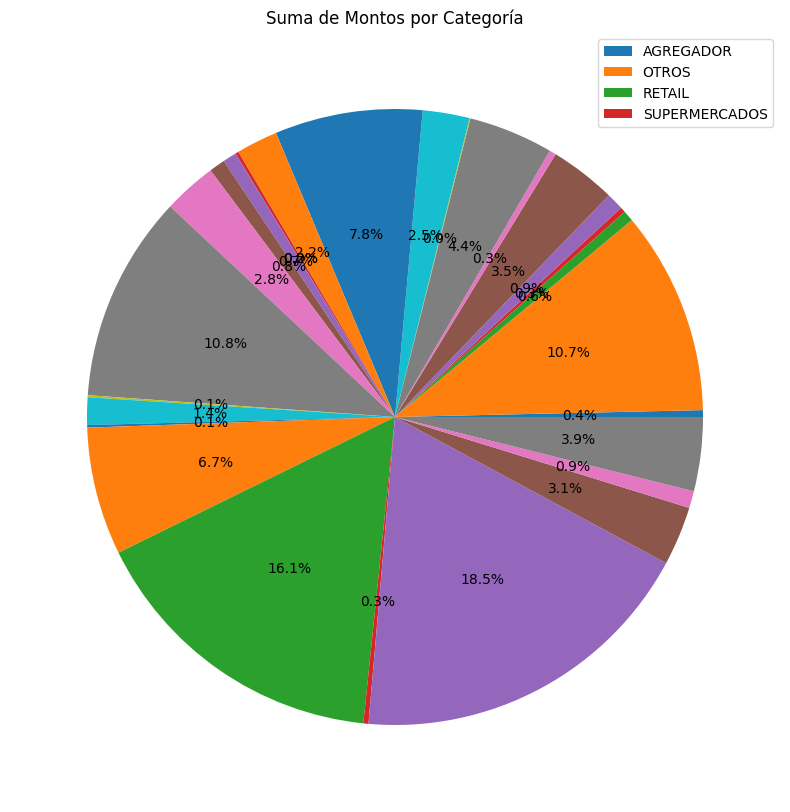

In [200]:
suma_por_categoria = df.groupby('giro_nombre')['monto_transaccion'].sum()

porcentajes = suma_por_categoria / suma_por_categoria.sum() * 100

# Establecer el umbral para mostrar en la leyenda
umbral = 10  # Porcentaje mínimo para mostrar en la leyenda

# Filtrar las categorías que superen el umbral
categorias_mostradas = porcentajes[porcentajes > umbral]


plt.figure(figsize=(10,10))
plt.pie(suma_por_categoria, autopct='%1.1f%%')
plt.title('Suma de Montos por Categoría')
plt.legend(categorias_mostradas.index, loc='best')


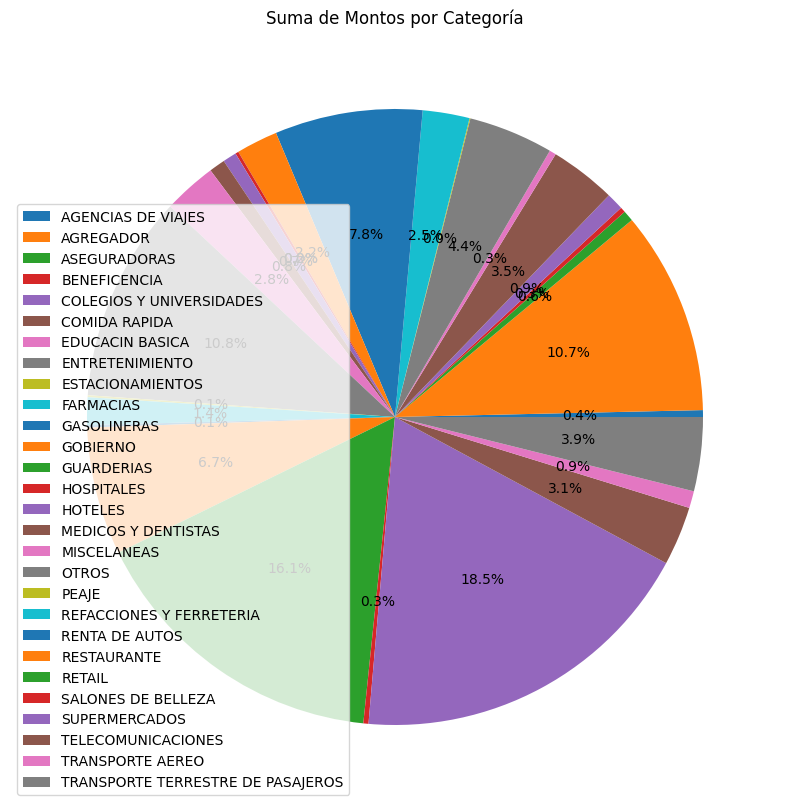

In [201]:
suma_por_categoria = df.groupby('giro_nombre')['monto_transaccion'].sum()

porcentajes = suma_por_categoria / suma_por_categoria.sum() * 100

# Establecer el umbral para mostrar en la leyenda
umbral = 10  # Porcentaje mínimo para mostrar en la leyenda

# Filtrar las categorías que superen el umbral
categorias_mostradas = porcentajes[porcentajes > umbral]


plt.figure(figsize=(10,10))
plt.pie(suma_por_categoria, autopct='%1.1f%%')
plt.title('Suma de Montos por Categoría')
plt.legend(suma_por_categoria.index, loc='best')
